<a href="https://colab.research.google.com/github/yseoyoung/python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#경사하강법
평균제곱오차(MSE)를 통하여 구함  
MSE : 실제 값과 예측값의 차이를 기준으로 오차를 판단하는 방식

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

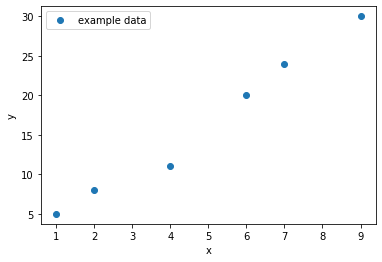

In [ ]:
ex_xs = [[2],[4],[7],[1],[9],[6]] #독립 변수 6개
ex_ys = [8,11,24,5,30,20] # 종속 변수 6개

plt.plot(ex_xs[:],ex_ys,'o',label="example data") # (2,8),,(4,11),(7,24),(1,5),(9,30),(6,20)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

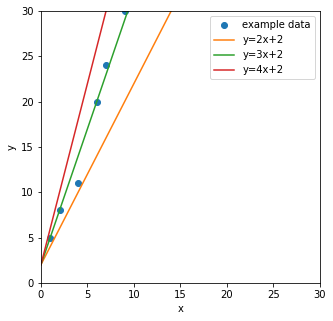

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(ex_xs[:],ex_ys,'o',label="example data")
plt.plot([0,30],[0*2+2,30*2+2],label="y=2x+2")
plt.plot([0,30],[0*3+2,30*3+2],label="y=3x+2")
plt.plot([0,30],[0*4+2,30*4+2],label="y=4x+2") # 해당 데이터를 지나가는 직선의 방정식을 구하는 방법 중 하나인 듯
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

경사하강법 수식  
mse = mean(y=yp)^2  
    = mena(y-(wx+b))^2  
mse'(=dmse/dw) = 2 * mean * (y-(wx+b)) * x   
mse'(=dmse/db) = 2 * mean * (y-(wx+b))  

In [ ]:
def mse(yp,y):
  """
  yp: 예측값, y:실제값
  (예측값-실제값)의 제곱을 평균으로 평균을 구하는 손실함수
  """
  return np.mean(sum(yp-y)**2)

In [ ]:
# 1. 편향를 알고 있다는 전제 하에 구하는 방법

b=2 #편향은 2라고 가정하자.
mses=[]
wpl = np.arange(-10,10,0.5) #가중치를 -10~10 범위에서 0.5씩 증가하면서 확인해보자.
for wp in wpl:
  yp = wp*np.array(ex_xs)+b #예측값
  mses.append(mse(yp,ex_ys)) #mse를 구하여 mses에 보관

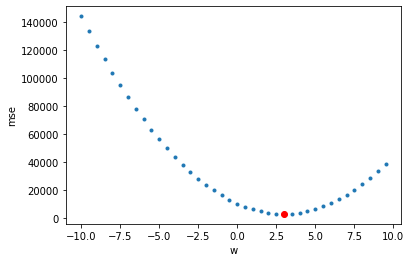

In [ ]:
mi = np.array(mses).argmin() #최소값이 있는 인덱스(mi) 
plt.plot(wpl,mses,'.')
plt.plot(wpl[mi],mses[mi],'or') #최솟값
plt.xlabel('w') #가중치 부분(=기울기)
plt.ylabel('mse') #mean square error (손실함수 값)
plt.show()

In [ ]:
# 2. 가중치를 알고 있다는 전제 하에 구하는 방법

w=3
mses2=[]
bpl = np.arange(-10,10,0.5) #가중치를 -10~10 범위에서 0.5씩 증가하면서 확인해보자.
for bp in bpl:
  yp = w*np.array(ex_xs)+bp #예측값
  mses2.append(mse(yp,ex_ys)) #mse를 구하여 mses에 보관

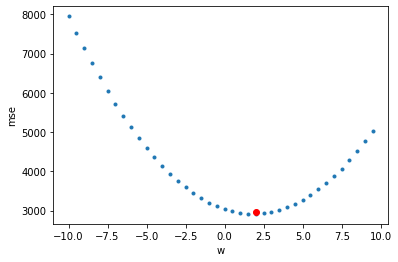

In [ ]:
mi2 = np.array(mses2).argmin() #최소값이 있는 인덱스(mi) 
plt.plot(bpl,mses2,'.')
plt.plot(bpl[mi2],mses2[mi],'or') #최솟값
plt.xlabel('w') #가중치 부분(=기울기)
plt.ylabel('mse') #mean square error (손실함수 값)
plt.show()

#파이썬으로 선형회귀 구현

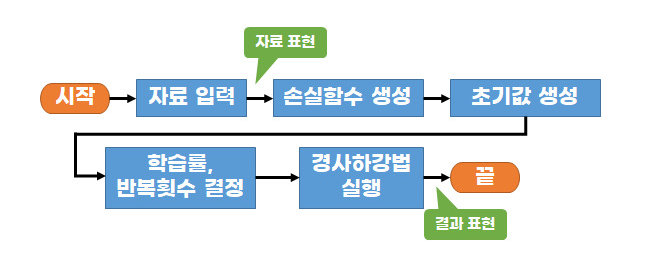

In [ ]:
def gradient(y,x,w,b):
  yp = w*x+b
  error = y-yp
  wd = -(2*sum(error*x)/len(x)) #평균
  bd = -(2*sum(error)/len(x))
  return wd,bd

In [ ]:
def gradient_descent(x,y,lr=0.0001,epochs=1000): 
  """
  경사 하강법 함수
  입력 매개변수 : x,y,lr,epochs
    x: 독립 변수
    y: 종속 변수
    lr(learning rate): 학습률 = 경사를 이동시킬 때 사용할 비율(lr*경사만큼 이동)  -> 작을수록 미세하고, 정교한 선형 회귀 (단, 학습하는데 오래 걸림)
    epochs: 학습 횟수
  """       
  if isinstance(x,list): #x가 list일 때,
    x = np.array(x).reshape(-1) #1차원 numpy 배열로 변화

  wbhl = [] #학습 과정을 기록할 컬렉션
  wp = np.random.uniform(-1,1) #가중치 초기값을 -1~1 사이의 랜던 값으로 지정
  bp = np.random.uniform(-1,1) #편향 초기값을 -1~1 사이의 랜던 값으로 지정

  amse = 0 #경사를 조절한 후에 mse를 기억할 변수를 0으로 초기화
  for epoch in range(epochs): #epoch 횟수만큼 학습시킨다
    bmse = amse #이전 mse로 설정
    wd,bd = gradient(y,x,wp,bp) #경사를 구함(여기에서는 경사에 - 부호를 취한 값)
    yp = wp*x + bp #예측

    amse = mse(yp,y) #새로 계산한 mse값
    wp = wp - (wd*lr) #이동할 비율만큼 가중치를 조절
    bp = bp - (bd*lr) #편향을 조절
    wbhl.append([wp,bp]) #히스토리에 가중치와 편향을 보관

    if np.abs(bmse-amse)<0.00001: #이전 mse와 이후 mse의 차이가 정해준 값보다 작다면
      break #더이상 학습하지 말고 반복문 탈출
  return wp,bp,wbhl #가중치, 편향, 히스토리 반환

In [ ]:
wp,bp,wbhl = gradient_descent(ex_xs,ex_ys)
for epoch, (ewp,ebp) in enumerate(wbhl):
  print(f"epoch:{epoch} w:{ewp} b:{ebp}")

In [ ]:
xs = np.array(ex_xs)
xs = xs[:,0] #1차원 배열
ys = np.array(ex_ys)

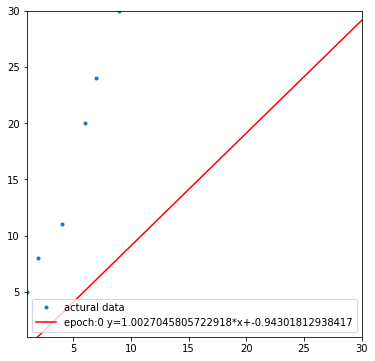

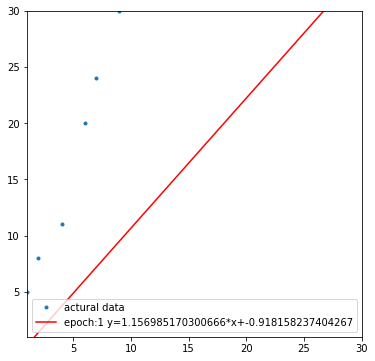

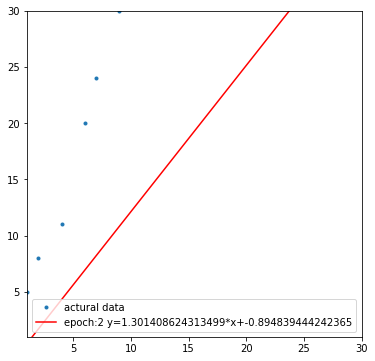

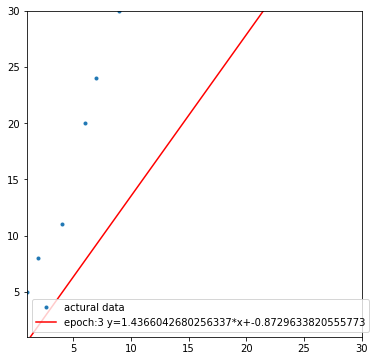

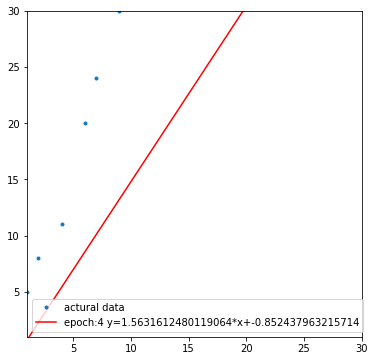

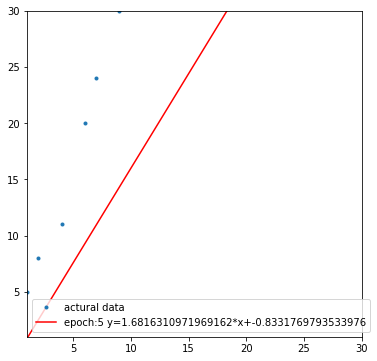

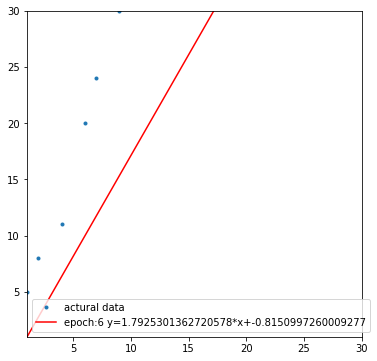

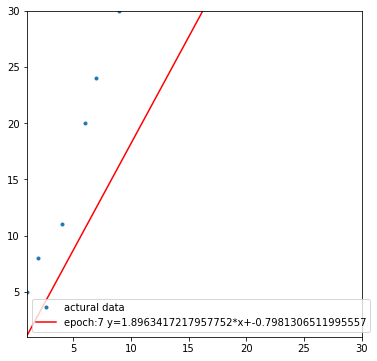

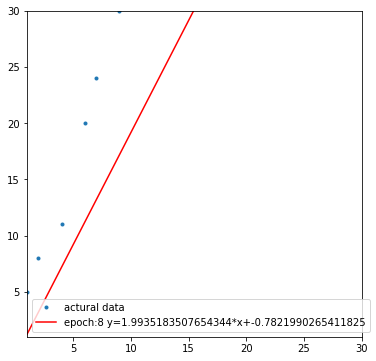

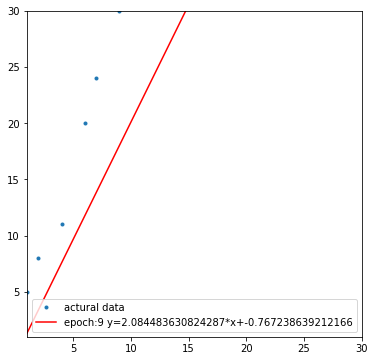

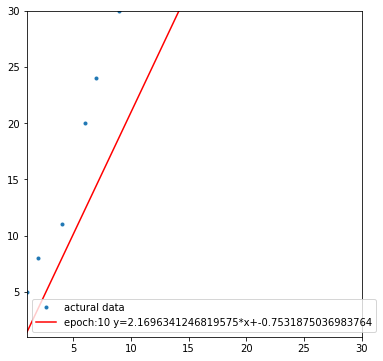

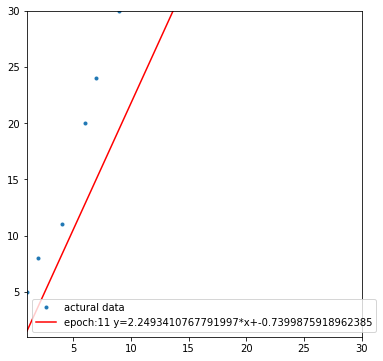

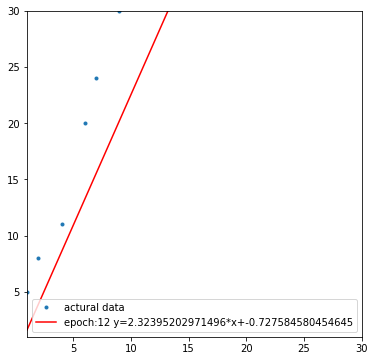

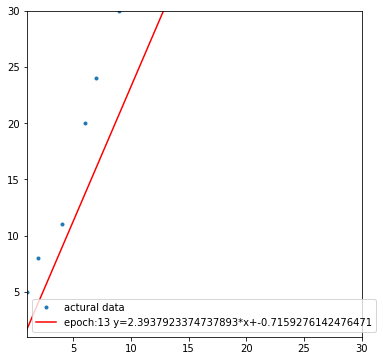

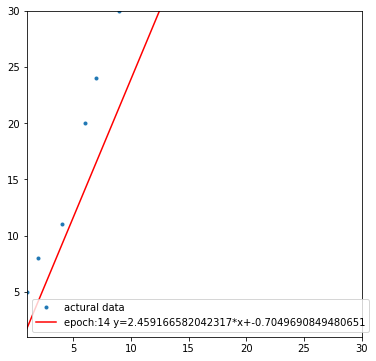

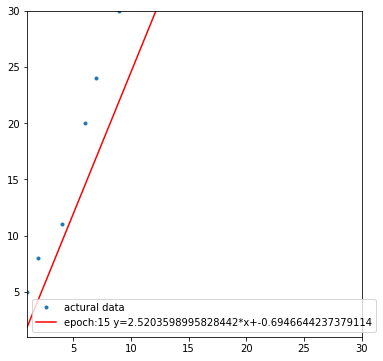

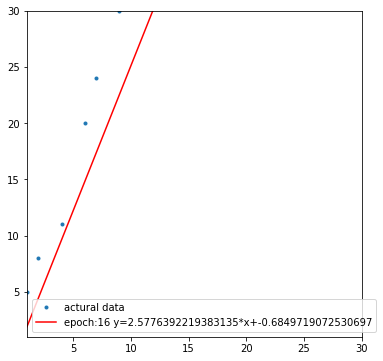

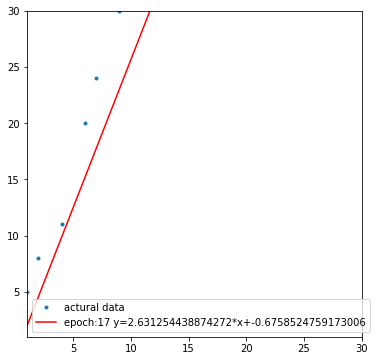

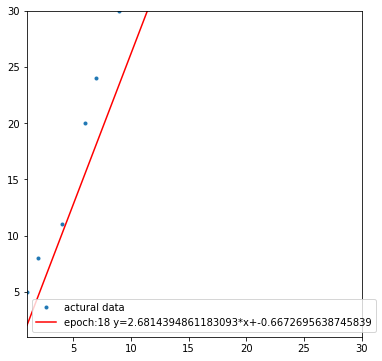

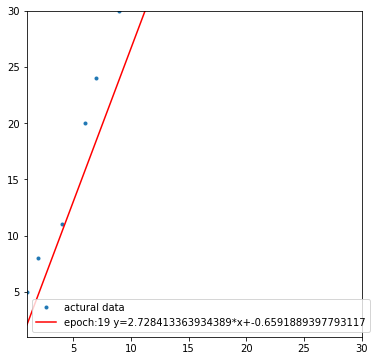

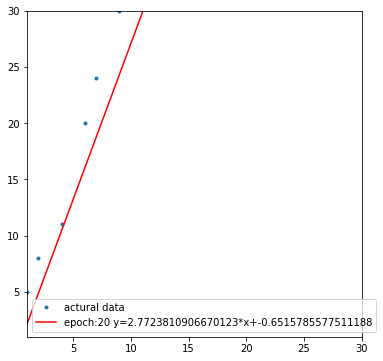

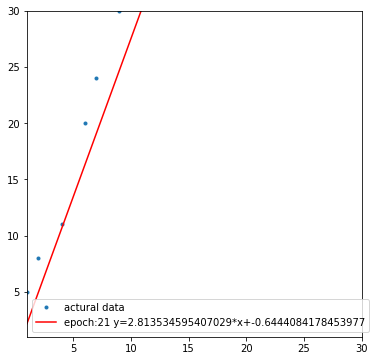

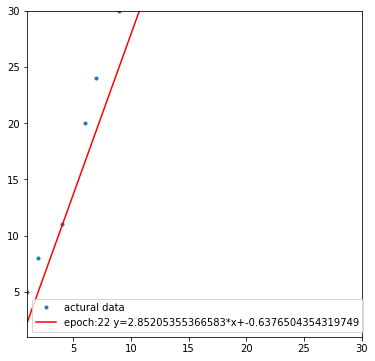

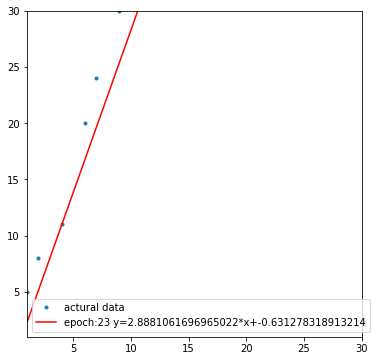

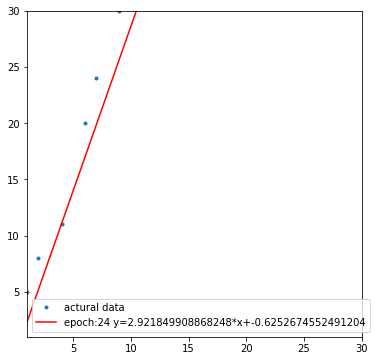

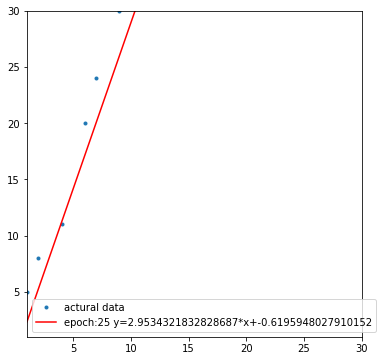

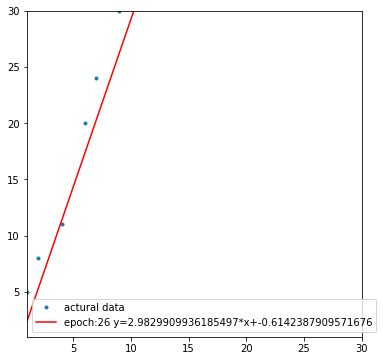

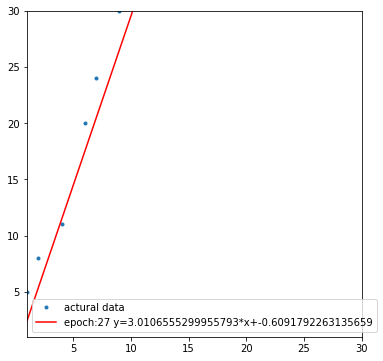

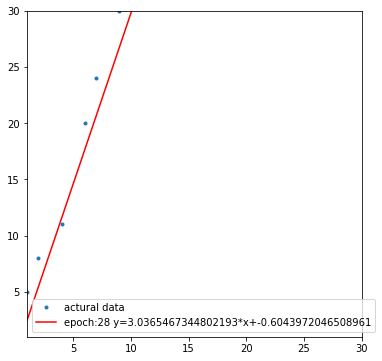

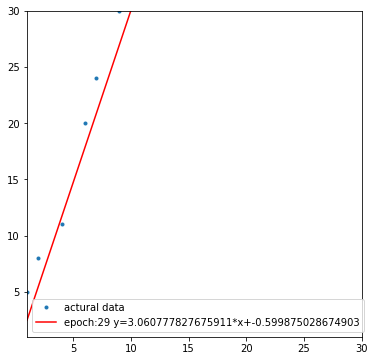

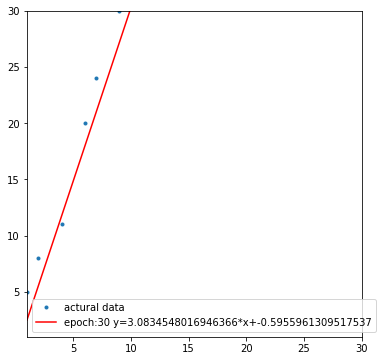

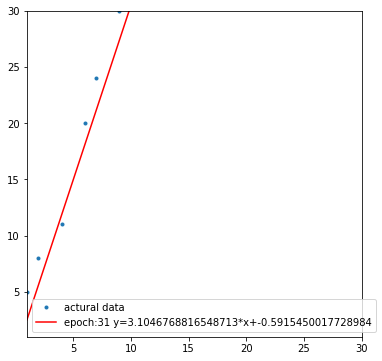

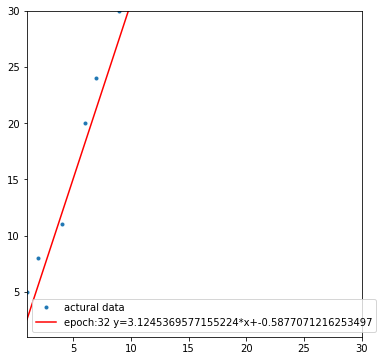

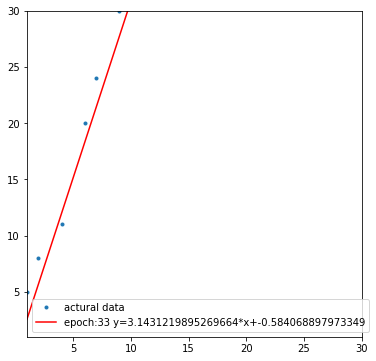

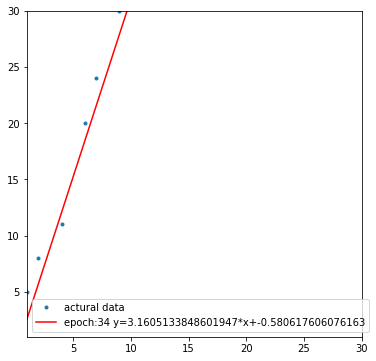

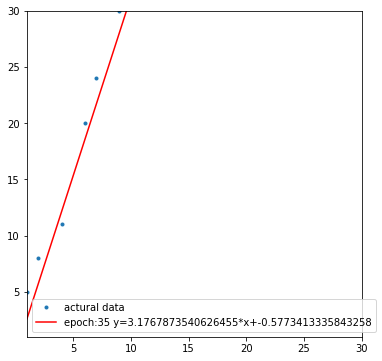

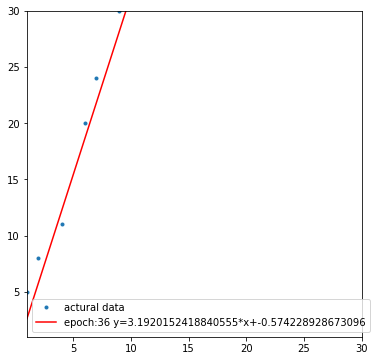

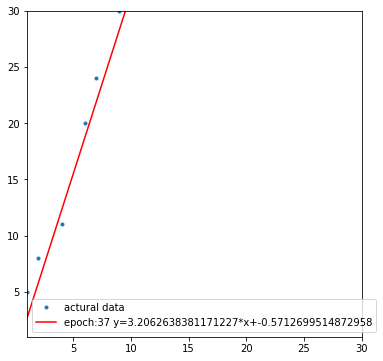

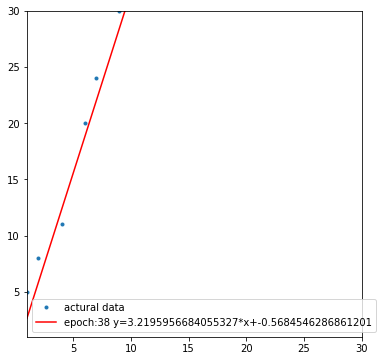

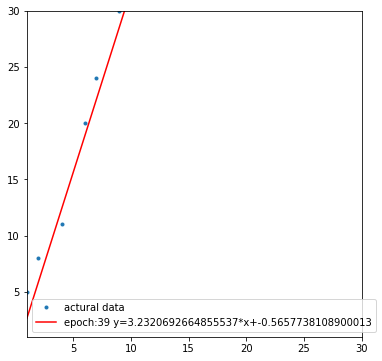

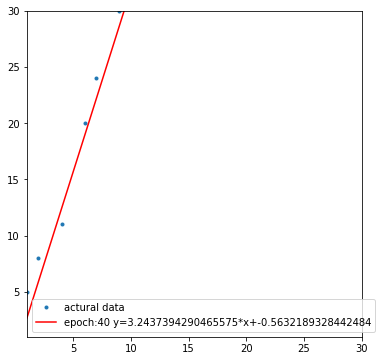

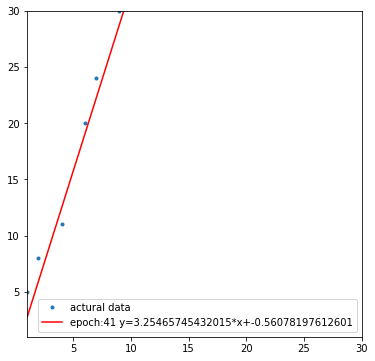

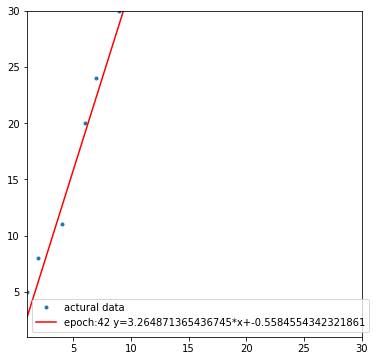

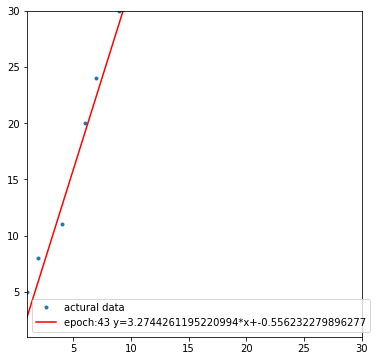

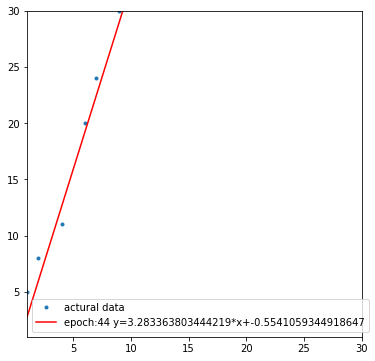

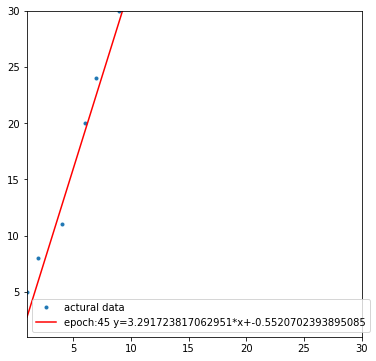

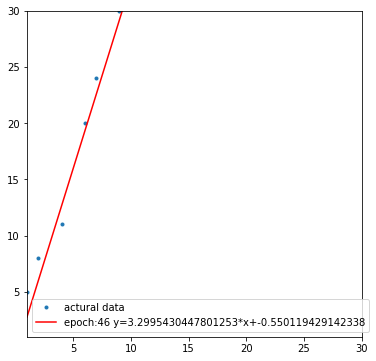

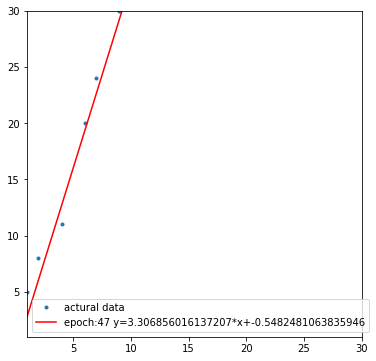

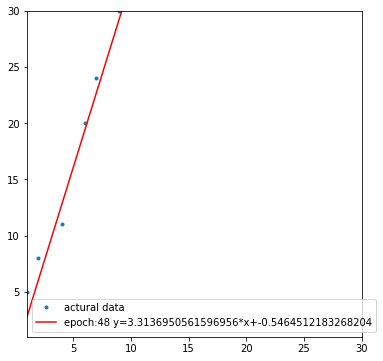

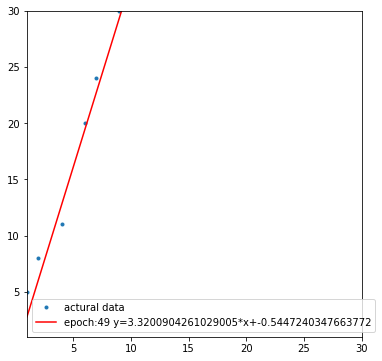

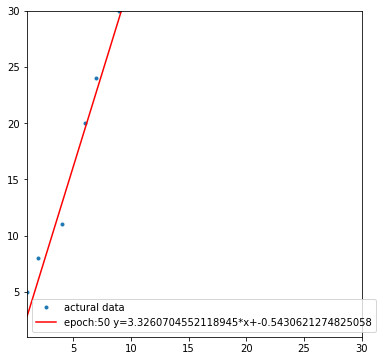

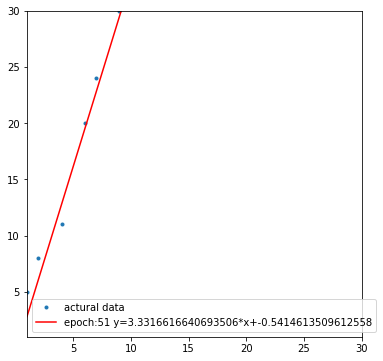

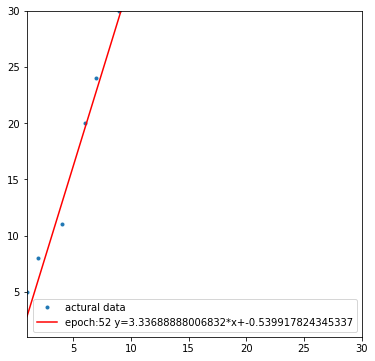

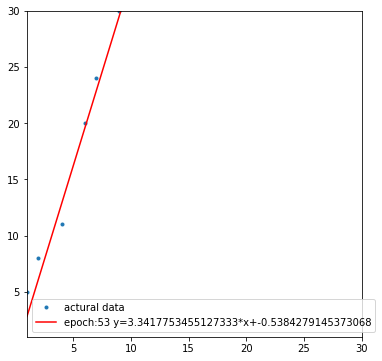

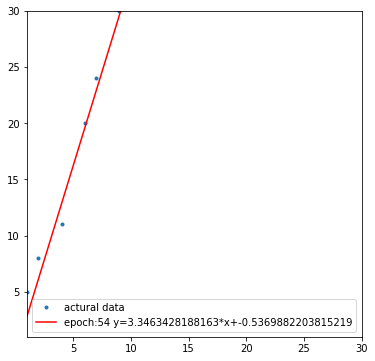

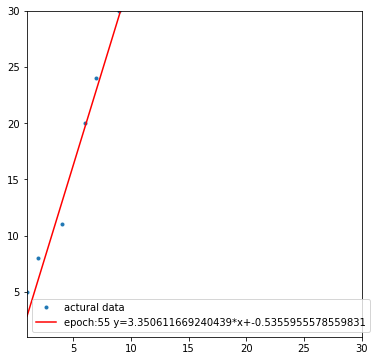

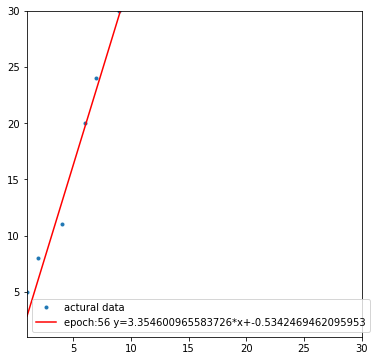

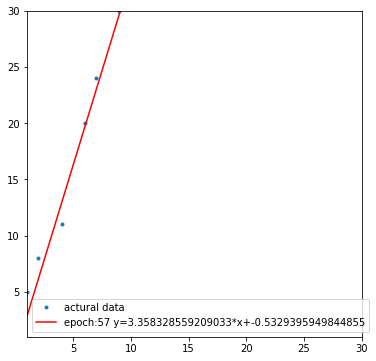

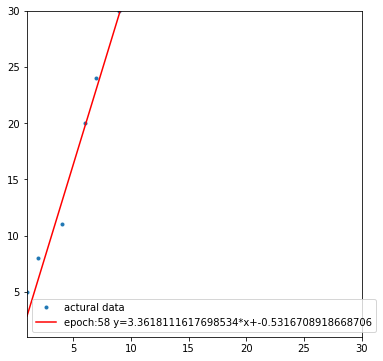

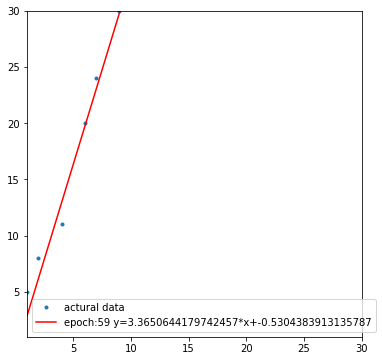

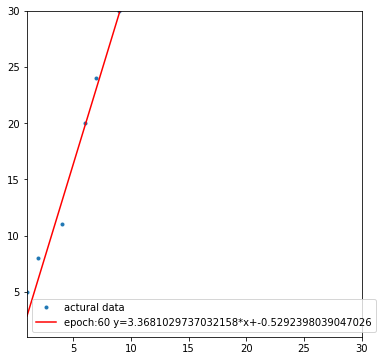

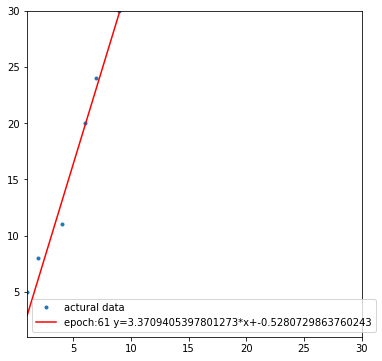

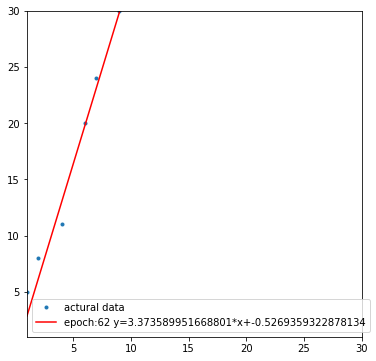

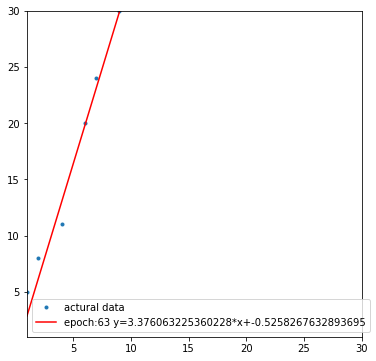

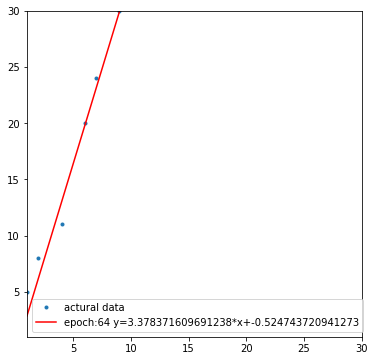

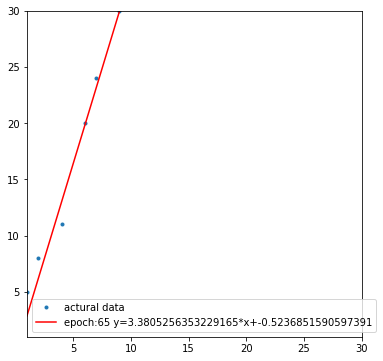

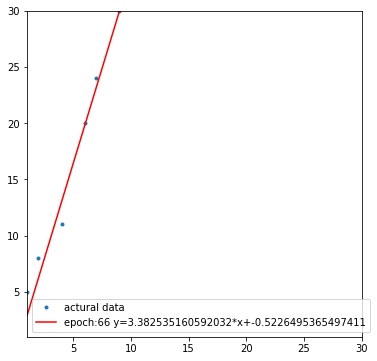

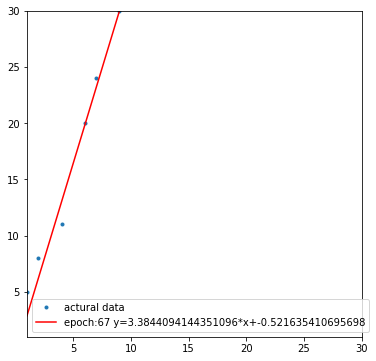

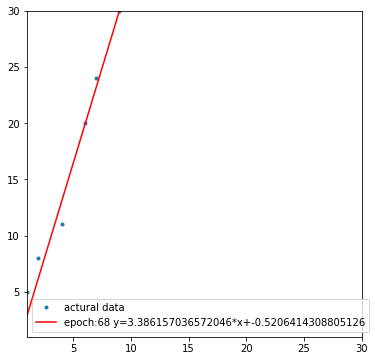

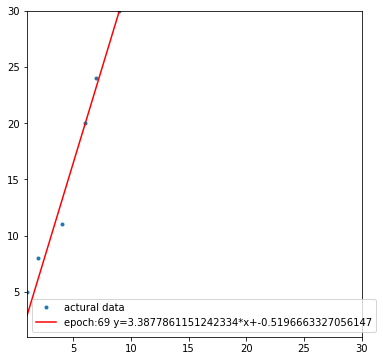

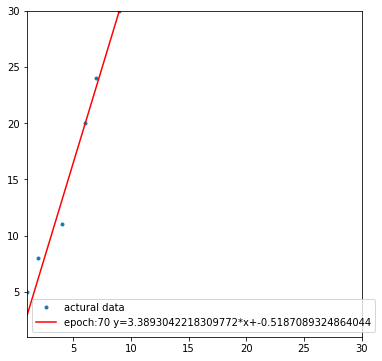

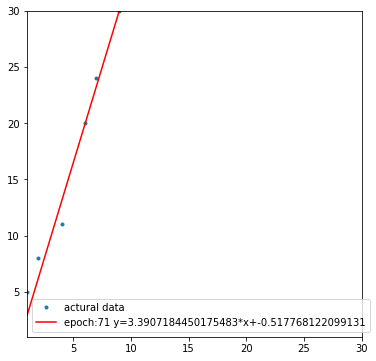

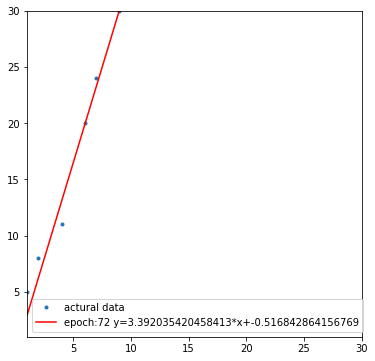

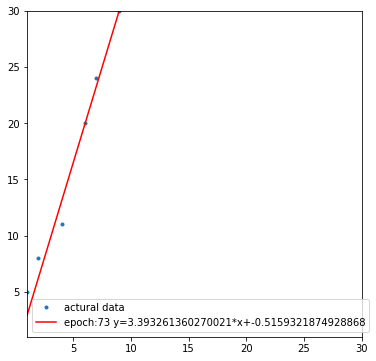

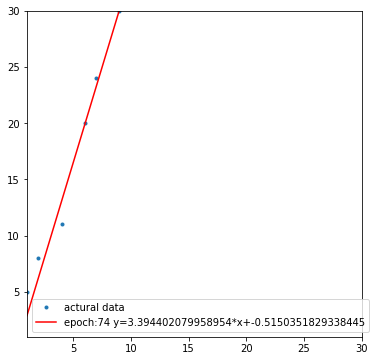

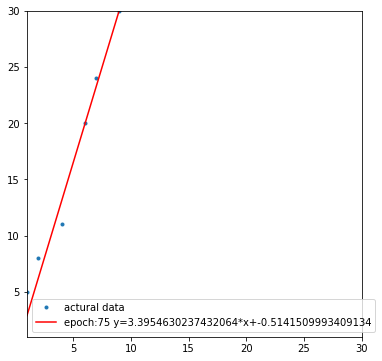

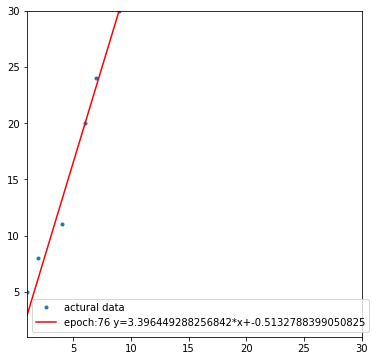

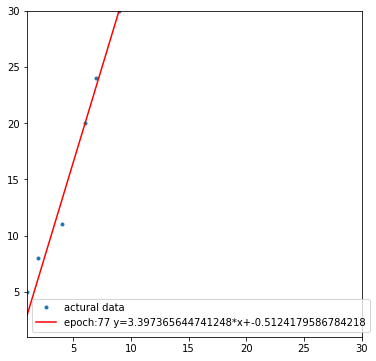

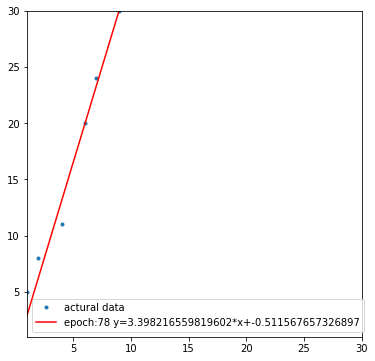

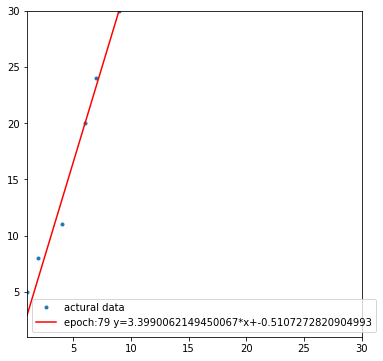

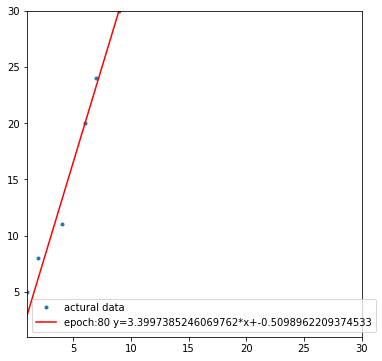

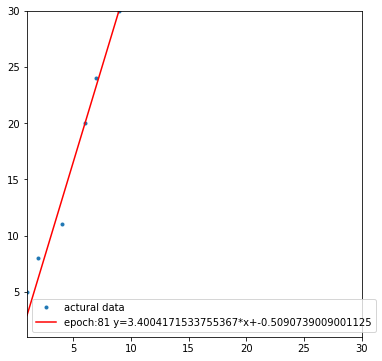

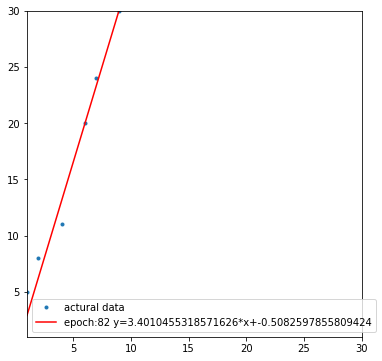

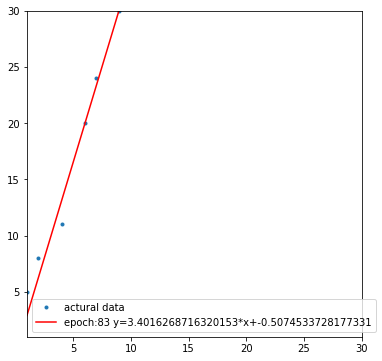

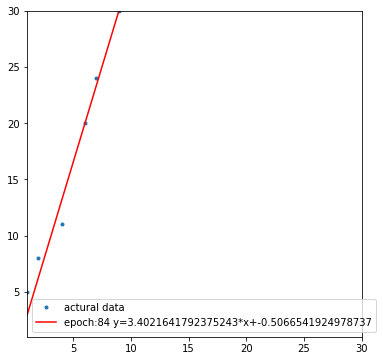

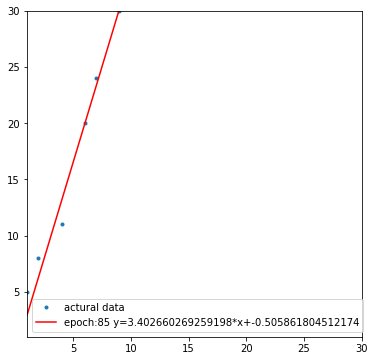

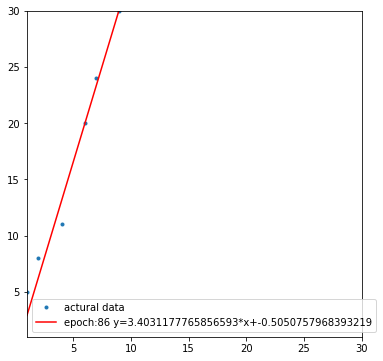

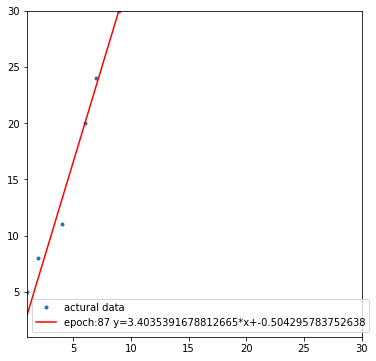

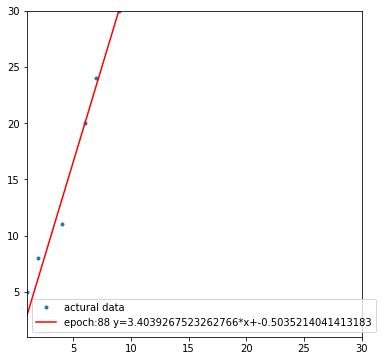

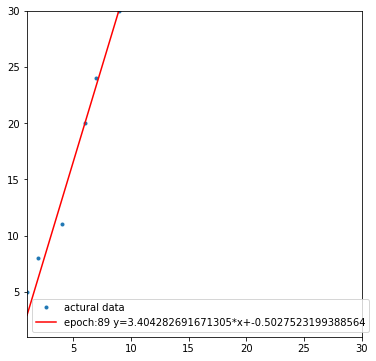

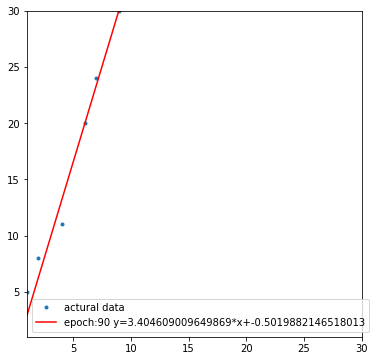

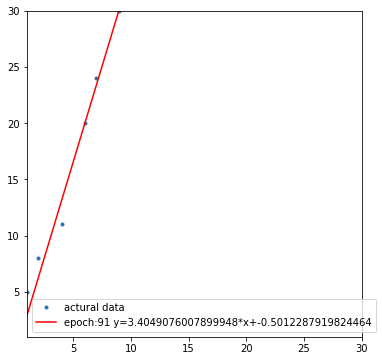

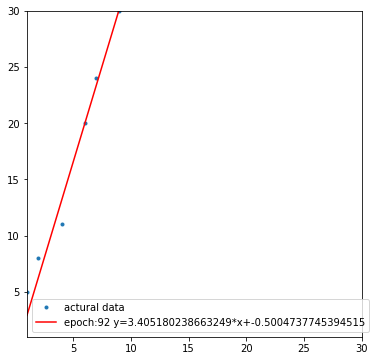

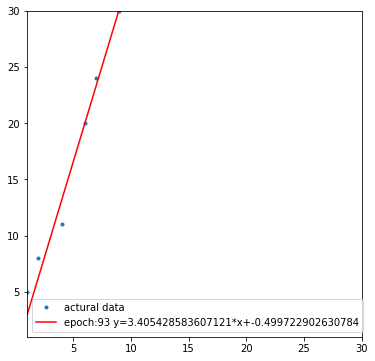

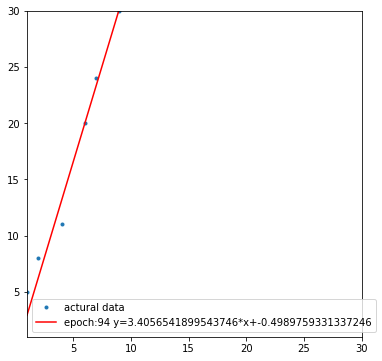

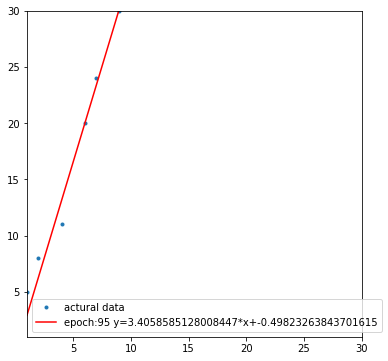

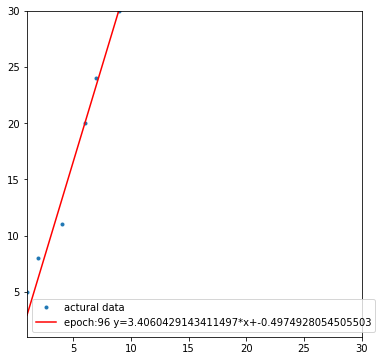

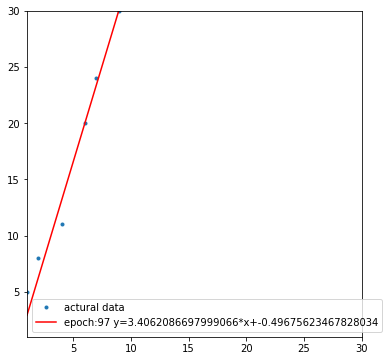

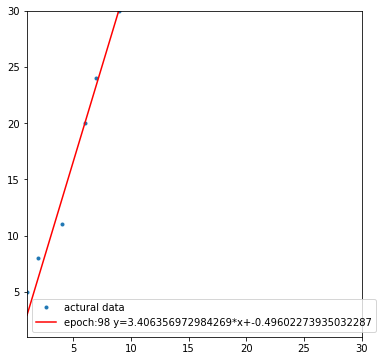

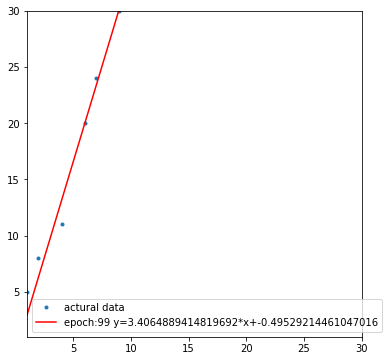

In [ ]:
min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))
for epoch, wb in enumerate(wbhl):
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]
  ex = max_val
  ey = ex*wb[0] + wb[1]

  plt.plot(xs,ys,'.',label='actural data')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

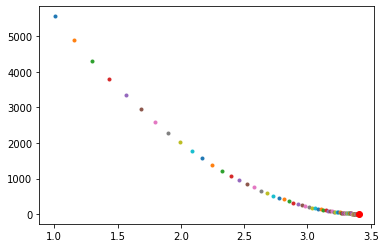

In [ ]:
min_index = -1 #최솟값이 있는 인덱스를 -1로 초기화
min_mse = np.inf #mse 최솟값을 무한대로 초기화
for epoch, (wp,bp) in enumerate(wbhl):
  yp = wp*xs+bp
  mse_val = mse(yp,ys)
  if min_mse > mse_val: #새로운 값이 더 작다면
    min_mse = mse_val #작은 값으로 설정
    min_index = epoch #최솟값이 있는 인덱스를 현재 인덱스로 설정
  plt.plot(wp,mse_val,'.')
plt.plot(wbhl[min_index][0],mse_val,'ro') #가장 작은 값 빨간 점으로 표시
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression # 파이썬 머신러닝 라이브러리 싸이킷런

lr_model = LinearRegression() #모델 생성
lr_model.fit(ex_xs,ex_ys) #학습 : fit() 메서드는 선형 회귀 모델에 필요한 두 가지 변수를 전달
print(f'w:{lr_model.coef_} b:{lr_model.intercept_}') #기울기: line_fitter.coef_ / 절편: line_fitter.intercept_

w:[3.1886121] b:0.9217081850533795


In [ ]:
pv = lr_model.predict([[12],[30],[50]]) #예측해 보아라.
print(pv) 

[ 39.18505338  96.58007117 160.35231317]


In [ ]:
from sklearn import datasets

iris_data = datasets.load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
xs = [[x] for x in iris_data.data[:,0]]
ys = [y for y in iris_data.data[:,1]]

In [ ]:
wp,bp,wbhl = gradient_descent(xs,ys)
for epoch, (ewp,ebp) in enumerate(wbhl):
  print(f"epoch:{epoch} w:{ewp} b:{ebp}")

epoch:0 w:-0.519232683772329 b:-0.44524932983485205
epoch:1 w:-0.5115312375153632 b:-0.4439420033724498
epoch:2 w:-0.5038849606872958 b:-0.4426439387988657
epoch:3 w:-0.4962934582016378 b:-0.44135506978704936
epoch:4 w:-0.4887563378012445 b:-0.4400753304849403
epoch:5 w:-0.48127321003805373 b:-0.43880465551206627
epoch:6 w:-0.4738436882529689 b:-0.43754297995616603
epoch:7 w:-0.46646738855588643 b:-0.4362902393698365
epoch:8 w:-0.459143929805866 b:-0.43504636976720357
epoch:9 w:-0.45187293359144287 b:-0.433811307620617
epoch:10 w:-0.44465402421108136 b:-0.432584989857369
epoch:11 w:-0.437486828653768 b:-0.43136735385643615
epoch:12 w:-0.43037097657974377 b:-0.43015833744524484
epoch:13 w:-0.4233061003013746 b:-0.4289578788964596
epoch:14 w:-0.4162918347641585 b:-0.42776591692479476
epoch:15 w:-0.40932781752786873 b:-0.42658239068384873
epoch:16 w:-0.40241368874783223 b:-0.4254072397629611
epoch:17 w:-0.3955490911563421 b:-0.42424040418409187
epoch:18 w:-0.3887336700442029 b:-0.42308182

In [ ]:
xs2 = np.array(xs)
xs2 = xs2[:,0]
ys2 = np.array(ys)
print(xs2.shape, ys2.shape)

(150,) (150,)


In [1]:
min_val = min(min(xs2),min(ys2))
max_val = max(max(xs2),max(ys2))
for epoch, wb in enumerate(wbhl):
  if epoch %10 !=0:
    continue
  plt.figure(figsize=(6,6))
  sx = min_val
  sy = sx*wb[0] + wb[1]
  ex = max_val
  ey = ex*wb[0] + wb[1]
   
  plt.plot(xs2,ys2,'.',label='actural data')
  plt.plot([sx,ex],[sy,ey],'r-',label=f'epoch:{epoch} y={wb[0]}*x+{wb[1]}')
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

NameError: ignored